# Creating a K-means clusterig model to find the fault classes in a PV installation

Importing Modules

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

Reading data

In [7]:
df=pd.read_excel('k1.xlsx')
df

,G,P
0,0.008667,0.018119
1,0.164500,0.369489
2,0.717500,1.601420
3,0.902167,1.973920
4,1.086000,2.448440
5,0.998833,2.156530
6,1.282000,2.913510
7,1.766170,3.957380
8,2.010670,4.351300
9,2.300500,4.948690


plotting relatioship between the variables

Text(0, 0.5, 'power')

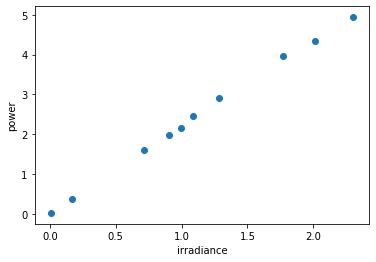

In [10]:
plt.scatter(df.G,df.P)
plt.xlabel('irradiance')
plt.ylabel('power')

Creating the cluster

In [11]:
km=KMeans(n_clusters=10)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

predicting cluster values

In [12]:
y_pred=km.fit_predict(df)
y_pred

array([7, 0, 3, 9, 8, 4, 1, 6, 2, 5])

In [13]:
df['cluster']=y_pred
df.head()

,G,P,cluster
0,0.008667,0.018119,7
1,0.164500,0.369489,0
2,0.717500,1.601420,3
3,0.902167,1.973920,9
4,1.086000,2.448440,8


Plotting the cluster

Text(0, 0.5, 'P')

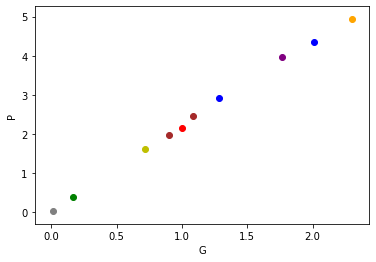

In [14]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='b')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='y')
plt.scatter(df4.G,df4.P, color='r')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='brown')
plt.scatter(df9.G,df9.P, color='brown')

plt.xlabel('G')
plt.ylabel('P')

Carrying out Normalisation for more effiecient results

In [15]:
scaler= MinMaxScaler()
scaler.fit(df[['G']])
df[['G']]=scaler.transform(df[['G']])
scaler.fit(df[['P']])
df[['P']]=scaler.transform(df[['P']])
df.head()

,G,P,cluster
0,0.000000,0.000000,7
1,0.067995,0.071264,0
2,0.309287,0.321119,3
3,0.389863,0.396668,9
4,0.470075,0.492909,8


In [16]:
km=KMeans(n_clusters=10)
y_pred=km.fit_predict(df[['G','P']])
y_pred

array([8, 0, 7, 3, 6, 9, 1, 4, 5, 2])

In [17]:
df['cluster']=y_pred

Text(0, 0.5, 'P')

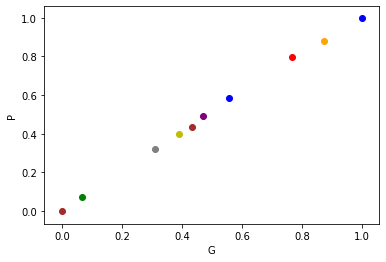

In [19]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='b')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='y')
plt.scatter(df4.G,df4.P, color='r')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='brown')
plt.scatter(df9.G,df9.P, color='brown')

plt.xlabel('G')
plt.ylabel('P')

obtaining the centroids for each cluster

In [20]:
km.cluster_centers_

array([[0.06799505, 0.07126361],
       [0.55559596, 0.58723242],
       [1.        , 1.        ],
       [0.3898627 , 0.39666829],
       [0.76685477, 0.79894622],
       [0.87353792, 0.8788396 ],
       [0.4700749 , 0.49290866],
       [0.3092866 , 0.32111924],
       [0.        , 0.        ],
       [0.43204116, 0.43370457]])

Text(0, 0.5, 'P')

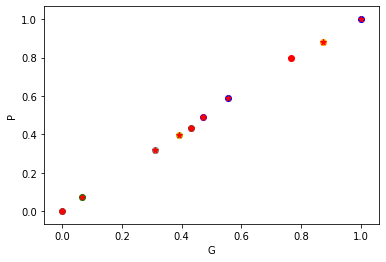

In [21]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='b')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='y')
plt.scatter(df4.G,df4.P, color='r')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='brown')
plt.scatter(df9.G,df9.P, color='brown')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

Implementing a the elbow technique to find the optimal K value

In [22]:
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['G','P']])
    sse.append(km.inertia_)

In [23]:
sse

[1.924057691916505,
 0.593012374012722,
 0.12647390866691718,
 0.0750600189228414,
 0.036203453784590035,
 0.021665905996830086,
 0.013426843720864497,
 0.006426268670945431,
 0.0015753541096566446,
 0.0]

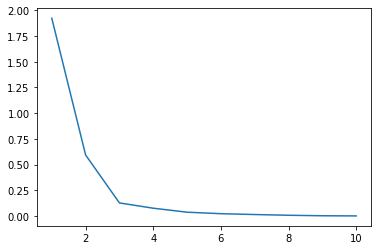

In [24]:
plt.plot(k_range,sse)

Fitting the model with the new K value as 3

In [25]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['G','P']])

In [26]:
df['cluster']=y_pred

Text(0, 0.5, 'P')

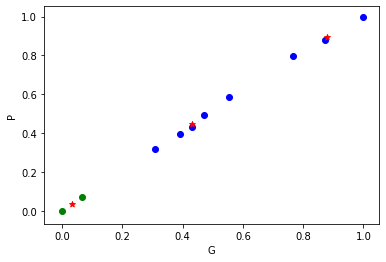

In [27]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='b')
plt.scatter(df2.G,df2.P, color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')